<a href="https://colab.research.google.com/github/SriDharshana/Socialmedia_Bullying_classification/blob/main/classification_of_online_bullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [14]:
df = pd.read_csv('/content/cyberbullying_tweets.csv')

In [15]:
k = pd.DataFrame(df)
k.sample(n=6)


,tweet_text,cyberbullying_type
47309,I just want to say one thing some loosers stop...,ethnicity
5890,@VinCastronovo Vinny can I get a GRANDnight pl...,not_cyberbullying
15880,@nat_com1 @Feminazi_Front Equanimity means cal...,gender
27688,this isn't just gamergate this isn't just game...,other_cyberbullying
27919,Throwback to when vivek offered to show me aro...,other_cyberbullying
6177,@eliza_sharp cus it goes from a to z ;),not_cyberbullying


In [5]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.5 MB/s 


In [16]:
import re 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import demoji
import string

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

PREPROCESSING

In [18]:
labelencoder = LabelEncoder()
df['cyberbullying_type_encoded'] = labelencoder.fit_transform(df['cyberbullying_type'])
df[['cyberbullying_type', 'cyberbullying_type_encoded']].value_counts()

cyberbullying_type   cyberbullying_type_encoded
religion             5                             7998
age                  0                             7992
gender               2                             7973
ethnicity            1                             7961
not_cyberbullying    3                             7945
other_cyberbullying  4                             7823
dtype: int64

In [19]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like'])
stemmer = SnowballStemmer('english')
def clean_text(text):
    
    # Remove Hashtag, Mention
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())
    
    # Make all text lowercase
    text = text.lower()

    # Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])

    #Remove URL's
    text= re.sub(r"((www.[^s]+)|(http\S+))","",text)
    
    # Removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)
    
    # Removing stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
    # Taking care of emojis
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text


In [43]:
def preprocess(text):
    df['cleaned_text'] = df['tweet_text'].apply(lambda text: clean_text(text))  
    return text

df['tweet_text'] = preprocess(df['tweet_text'])
df.sample(n=6)

,tweet_text,cyberbullying_type,cyberbullying_type_encoded,cleaned_text
8854,@DaftBrian Is that what #AskHerMore is?,gender,2,
15899,Offal and marrow?,gender,2,offal marrow
11945,I tried watching Ohshc but I despised it after...,gender,2,tri watch ohshc despis 9 episodes sexist kinda...
36617,Morrison really looks like the school bully,age,0,morrison realli look school bulli
3830,@AntonM ☺️,not_cyberbullying,3,smiling_face
25772,@ikralla @MattFossen I run on autoit in the ba...,other_cyberbullying,4,run autoit background becaus clickerheroes mig...


In [44]:
df['cleaned_text'].duplicated().sum()

2375

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
X, y = df['tweet_text'], df['cyberbullying_type']


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 60)


In [48]:
tfidf = TfidfVectorizer(max_features = 5000)

In [49]:
X_train_tfidf = tfidf.fit_transform(X_train) 
X_test_tfidf = tfidf.transform(X_test) 

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tfidf_array_train = X_train_tfidf.toarray()   
tfidf_array_test = X_test_tfidf.toarray()    
scaled_X_train = scaler.fit_transform(tfidf_array_train) 
scaled_X_test = scaler.transform(tfidf_array_test)

In [51]:
scaled_X_train.shape

(33384, 5000)

In [52]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

NAIVE - BAYES

In [53]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

FITTING THE MODEL

In [54]:
Naive_bayes_model=nb_model.fit(X_train_tfidf, y_train)

ACCURACY

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


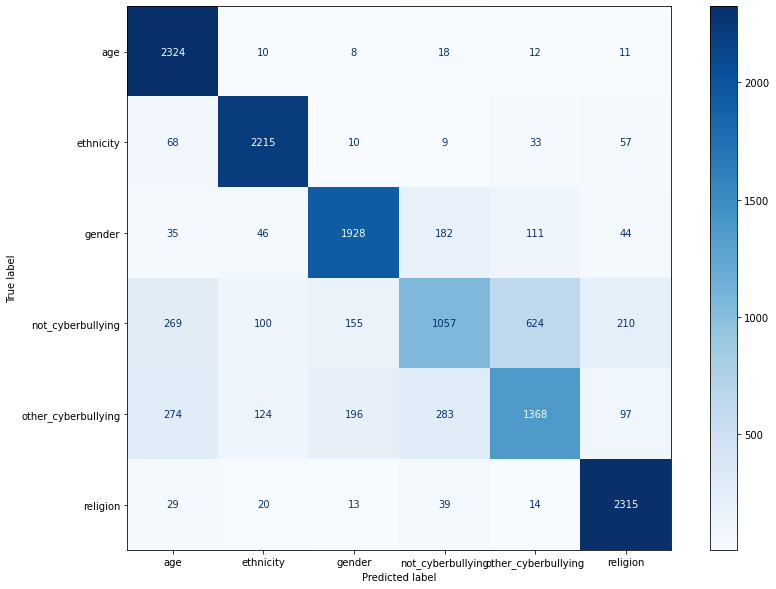

In [76]:
preds_nb_model = nb_model.predict(X_test_tfidf)
fig, ax = plt.subplots(figsize=(14, 10))

plot_confusion_matrix(nb_model, X_test_tfidf, y_test,cmap=plt.cm.Blues, ax=ax)

In [58]:
print("Accuracy : ",accuracy_score(y_test, preds_nb_model))

Accuracy : 0.89364253471814


In [59]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf', TfidfVectorizer(max_features = 1000)), ('NAIVE BAYES MODEL', MultinomialNB())])
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=1000)),
                ('NAIVE BAYES MODEL', MultinomialNB())])

TESTING WITH A SAMPLE TEXT

In [60]:
sample_text=["@pradeep : A feminist is an advocacy of the political, economic, and social equality of the sexes expressed especially through organized activity on behalf of women's rights and interests"]

PREDICTION

In [61]:
pipe.predict(sample_text)

array(['gender'], dtype='<U19')

SAVING THE MODEL

In [42]:
import pickle
pickle.dump(pipe, open('model.pkl', 'wb'))